#Preparation

In [83]:
#some may not have pandas technical analysis library preinstalled
!pip install pandas-ta

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta

##Fetch Data

In [85]:
data = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=["Price"]) #change parse_dates using unique coloumn

print(data.head(10))

        Price           Adj Close               Close                High  \
0      Ticker                NVDA                NVDA                NVDA   
1        Date                 NaN                 NaN                 NaN   
2  2018-01-02   4.929879665374756   4.983749866485596   4.987500190734863   
3  2018-01-03   5.254334926605225  5.3117499351501465    5.34250020980835   
4  2018-01-04  5.2820329666137695   5.339749813079834   5.451250076293945   
5  2018-01-05   5.326793670654297   5.385000228881836   5.422749996185303   
6  2018-01-08   5.490012168884277   5.550000190734863               5.625   
7  2018-01-09   5.488528251647949   5.548500061035156  5.5954999923706055   
8  2018-01-10   5.531556606292725  5.5920000076293945  5.5954999923706055   
9  2018-01-11    5.54144811630249  5.6020002365112305   5.656750202178955   

                  Low               Open     Volume  
0                NVDA               NVDA       NVDA  
1                 NaN                NaN    

<ipython-input-85-49569a68c45a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=["Price"]) #change parse_dates using unique coloumn


#Data Preprocessing

In [86]:
# Convert 'Adj Close' and 'Open' columns to numeric type
data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

#Indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

#Binary Classification
data['TargetClass'] = [1 if data.Target.iloc[i]>0 else 0 for i in range(len(data))]

#Creates a target variable representing the adjusted closing price of the next day
#by shifting the Adj Close column by one period using shift(-1).
data['TargetNextClose'] = data['Adj Close'].shift(-1)

#Data Cleaning
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Price', 'index'], axis=1, inplace=True)

In [87]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.index = np.arange(1, len(data_set) + 1)
data_set.head(10)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Adj Close,High,Low,Open,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
1,6.205464,6.26950,6.03025,6.08975,51.367046,6.231595,6.127848,6.014307,-0.048141,0,6.242109
2,6.242109,6.32650,6.27325,6.29025,52.935617,6.238348,6.131307,6.018125,0.000146,1,6.289896
3,6.289896,6.35425,6.24275,6.28975,54.965107,6.249053,6.135652,6.022530,-0.037803,0,6.362197
4,6.362197,6.44250,6.37300,6.40000,57.907406,6.265691,6.141357,6.027844,-0.026404,0,6.398596
5,6.398596,6.50600,6.38975,6.42500,59.340248,6.284244,6.147677,6.033575,-0.128435,0,6.350065
6,6.350065,6.48125,6.40375,6.47850,56.588414,6.296364,6.152901,6.038581,-0.020035,0,6.308715
7,6.308715,6.40250,6.31750,6.32875,54.290053,6.303353,6.157195,6.042967,-0.036855,0,6.341645
8,6.341645,6.52500,6.37675,6.37850,55.821148,6.312843,6.162062,6.047736,-0.036376,0,6.473125
9,6.473125,6.55000,6.42550,6.50950,61.357957,6.334072,6.169462,6.054199,-0.141812,0,6.414938
10,6.414938,6.59100,6.39750,6.55675,57.916207,6.347684,6.175552,6.059799,-0.173170,0,6.374331


In [88]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

#Data Scaling

In [89]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.02306539 0.02196196 0.02257199 ... 0.51634932 0.         0.02334216]
 [0.02334216 0.02237647 0.02445122 ... 0.51912207 1.         0.02370306]
 [0.02370306 0.02257828 0.02421535 ... 0.51694292 0.         0.02424911]
 ...
 [0.90893598 0.88495429 0.91640149 ... 0.36013606 0.         0.91293848]
 [0.91293848 0.90480729 0.91787086 ... 0.37105704 0.         0.89300144]
 [0.89300144 0.87833659 0.89822791 ... 0.69836663 1.         0.89330348]]


#Data in Array

In [90]:
# multiple feature from data provided to the model
X = []
backcandles = 70
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

1549
[[[0.02306539 0.02196196 0.02257199 ... 0.02201173 0.01911294 0.01828124]
  [0.02334216 0.02237647 0.02445122 ... 0.02206687 0.01914518 0.01831948]
  [0.02370306 0.02257828 0.02421535 ... 0.02215427 0.01918568 0.01836361]
  ...
  [0.01568921 0.01542973 0.0164529  ... 0.01664315 0.01955792 0.01969122]
  [0.01619998 0.01589515 0.01676611 ... 0.01646487 0.01940458 0.0195837 ]
  [0.01474057 0.01480796 0.01534508 ... 0.01615195 0.01921828 0.01945173]]

 [[0.02334216 0.02237647 0.02445122 ... 0.02206687 0.01914518 0.01831948]
  [0.02370306 0.02257828 0.02421535 ... 0.02215427 0.01918568 0.01836361]
  [0.02424911 0.02322005 0.02522263 ... 0.0222901  0.01923885 0.01841685]
  ...
  [0.01619998 0.01589515 0.01676611 ... 0.01646487 0.01940458 0.0195837 ]
  [0.01474057 0.01480796 0.01534508 ... 0.01615195 0.01921828 0.01945173]
  [0.0146807  0.01442435 0.01480568 ... 0.0158626  0.01903419 0.01932045]]

 [[0.02370306 0.02257828 0.02421535 ... 0.02215427 0.01918568 0.01836361]
  [0.02424911 0.0

In [91]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

#Data Splitting into train test sets

In [92]:
splitlimit = int(len(X)*0.8) # 80% for training, 20% for test
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1183
(1183, 70, 8)
(296, 70, 8)
(1183, 1)
(296, 1)
[[0.01166271]
 [0.01349073]
 [0.01309406]
 ...
 [0.32103017]
 [0.31931651]
 [0.32269851]]


#LSTM Model Training

In [93]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input') #creates an input layer for the network
inputs = LSTM(150, name='first_layer')(lstm_input) #Adds LSTM layer with 150 units to the model.
inputs = Dense(1, name='dense_layer')(inputs) #A Dense layer is a fully connected layer where each neuron is connected to every neuron in the previous layer.
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)

#Creates an instance of the Adam Optimizer Algorithm
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

#Training the Model
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - loss: 0.0042 - val_loss: 6.6489e-04
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - loss: 7.0845e-05 - val_loss: 2.8178e-04
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 5.5872e-05 - val_loss: 2.0548e-04
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 4.9740e-05 - val_loss: 1.6330e-04
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 5.9148e-05 - val_loss: 2.6597e-04
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 4.4269e-05 - val_loss: 2.6202e-04
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 5.0924e-05 - val_loss: 1.5805e-04
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 5.4395e-05 - val_loss: 4.0867e-04
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 4.6927e-05 - val_loss: 2.7456e-04
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 4.2243e-05 - val_loss: 3.6333e-04
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 4.6614e-0

#Prediction and Comparison

In [94]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
[0.3108407] [0.32911519]
[0.31447178] [0.32895662]
[0.3197631] [0.32728072]
[0.32250902] [0.31038611]
[0.32232985] [0.31224313]
[0.30894598] [0.31348871]
[0.303899] [0.31905234]
[0.30310568] [0.31336797]
[0.30624852] [0.29743953]
[0.30344546] [0.2961864]


#Visualization

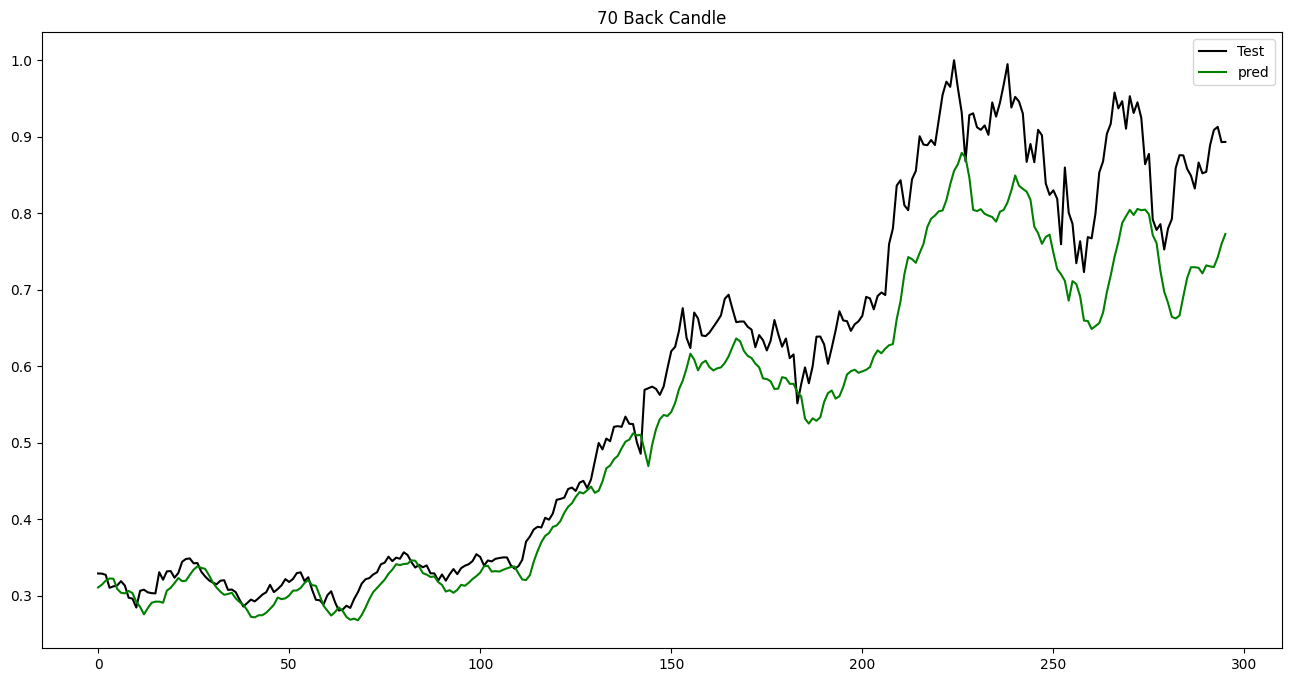

In [95]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.title("70 Back Candle")
plt.legend()
plt.show()